# ML Project : chord embedding

In [1]:
# Useful starting lines
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Load the data
When loading the key dataset, we can choose whether to drop one-word sentences.  
When loading the chord dataset, we can choose whether to keep sections in major or minor key, or both.

In [2]:
from load_data import load_chord_data, load_key_data, all_composers

In [3]:
# Optional parameter for load_key_data: drop_one_worders = True/False
bach_key = load_key_data(all_composers)

# Optional parameter for load_chord_data: key_mode = 'both'/'major'/'minor'
bach_chord_both = load_chord_data(all_composers, key_mode='both')

## Apply Word2Vec

In [4]:
from gensim.models import Word2Vec

In [5]:
# Ignore words with a lower frequency frequency than this
min_count = 10
# Size of the embedding space
size = 20 
# Neighborhood of the focus word to study
window = 2
# 0 for CBOW, 1 for skip-gram
sg = 0 

# The first argument has to be a list of lists of words
model_bach_both = Word2Vec(bach_chord_both, min_count=min_count, size=size, window=window, sg=sg)

## Reduce dimensionality and visualise

### Reduce dimensionality: PCA

In [6]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from reduce_dim import reduce_dim_keyed_vec

In [7]:
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)
wv_red = reduce_dim_keyed_vec(model_bach_both.wv, pca.fit_transform)

### Visualise

In [8]:
from visual import visual_reduced_chord_vectors

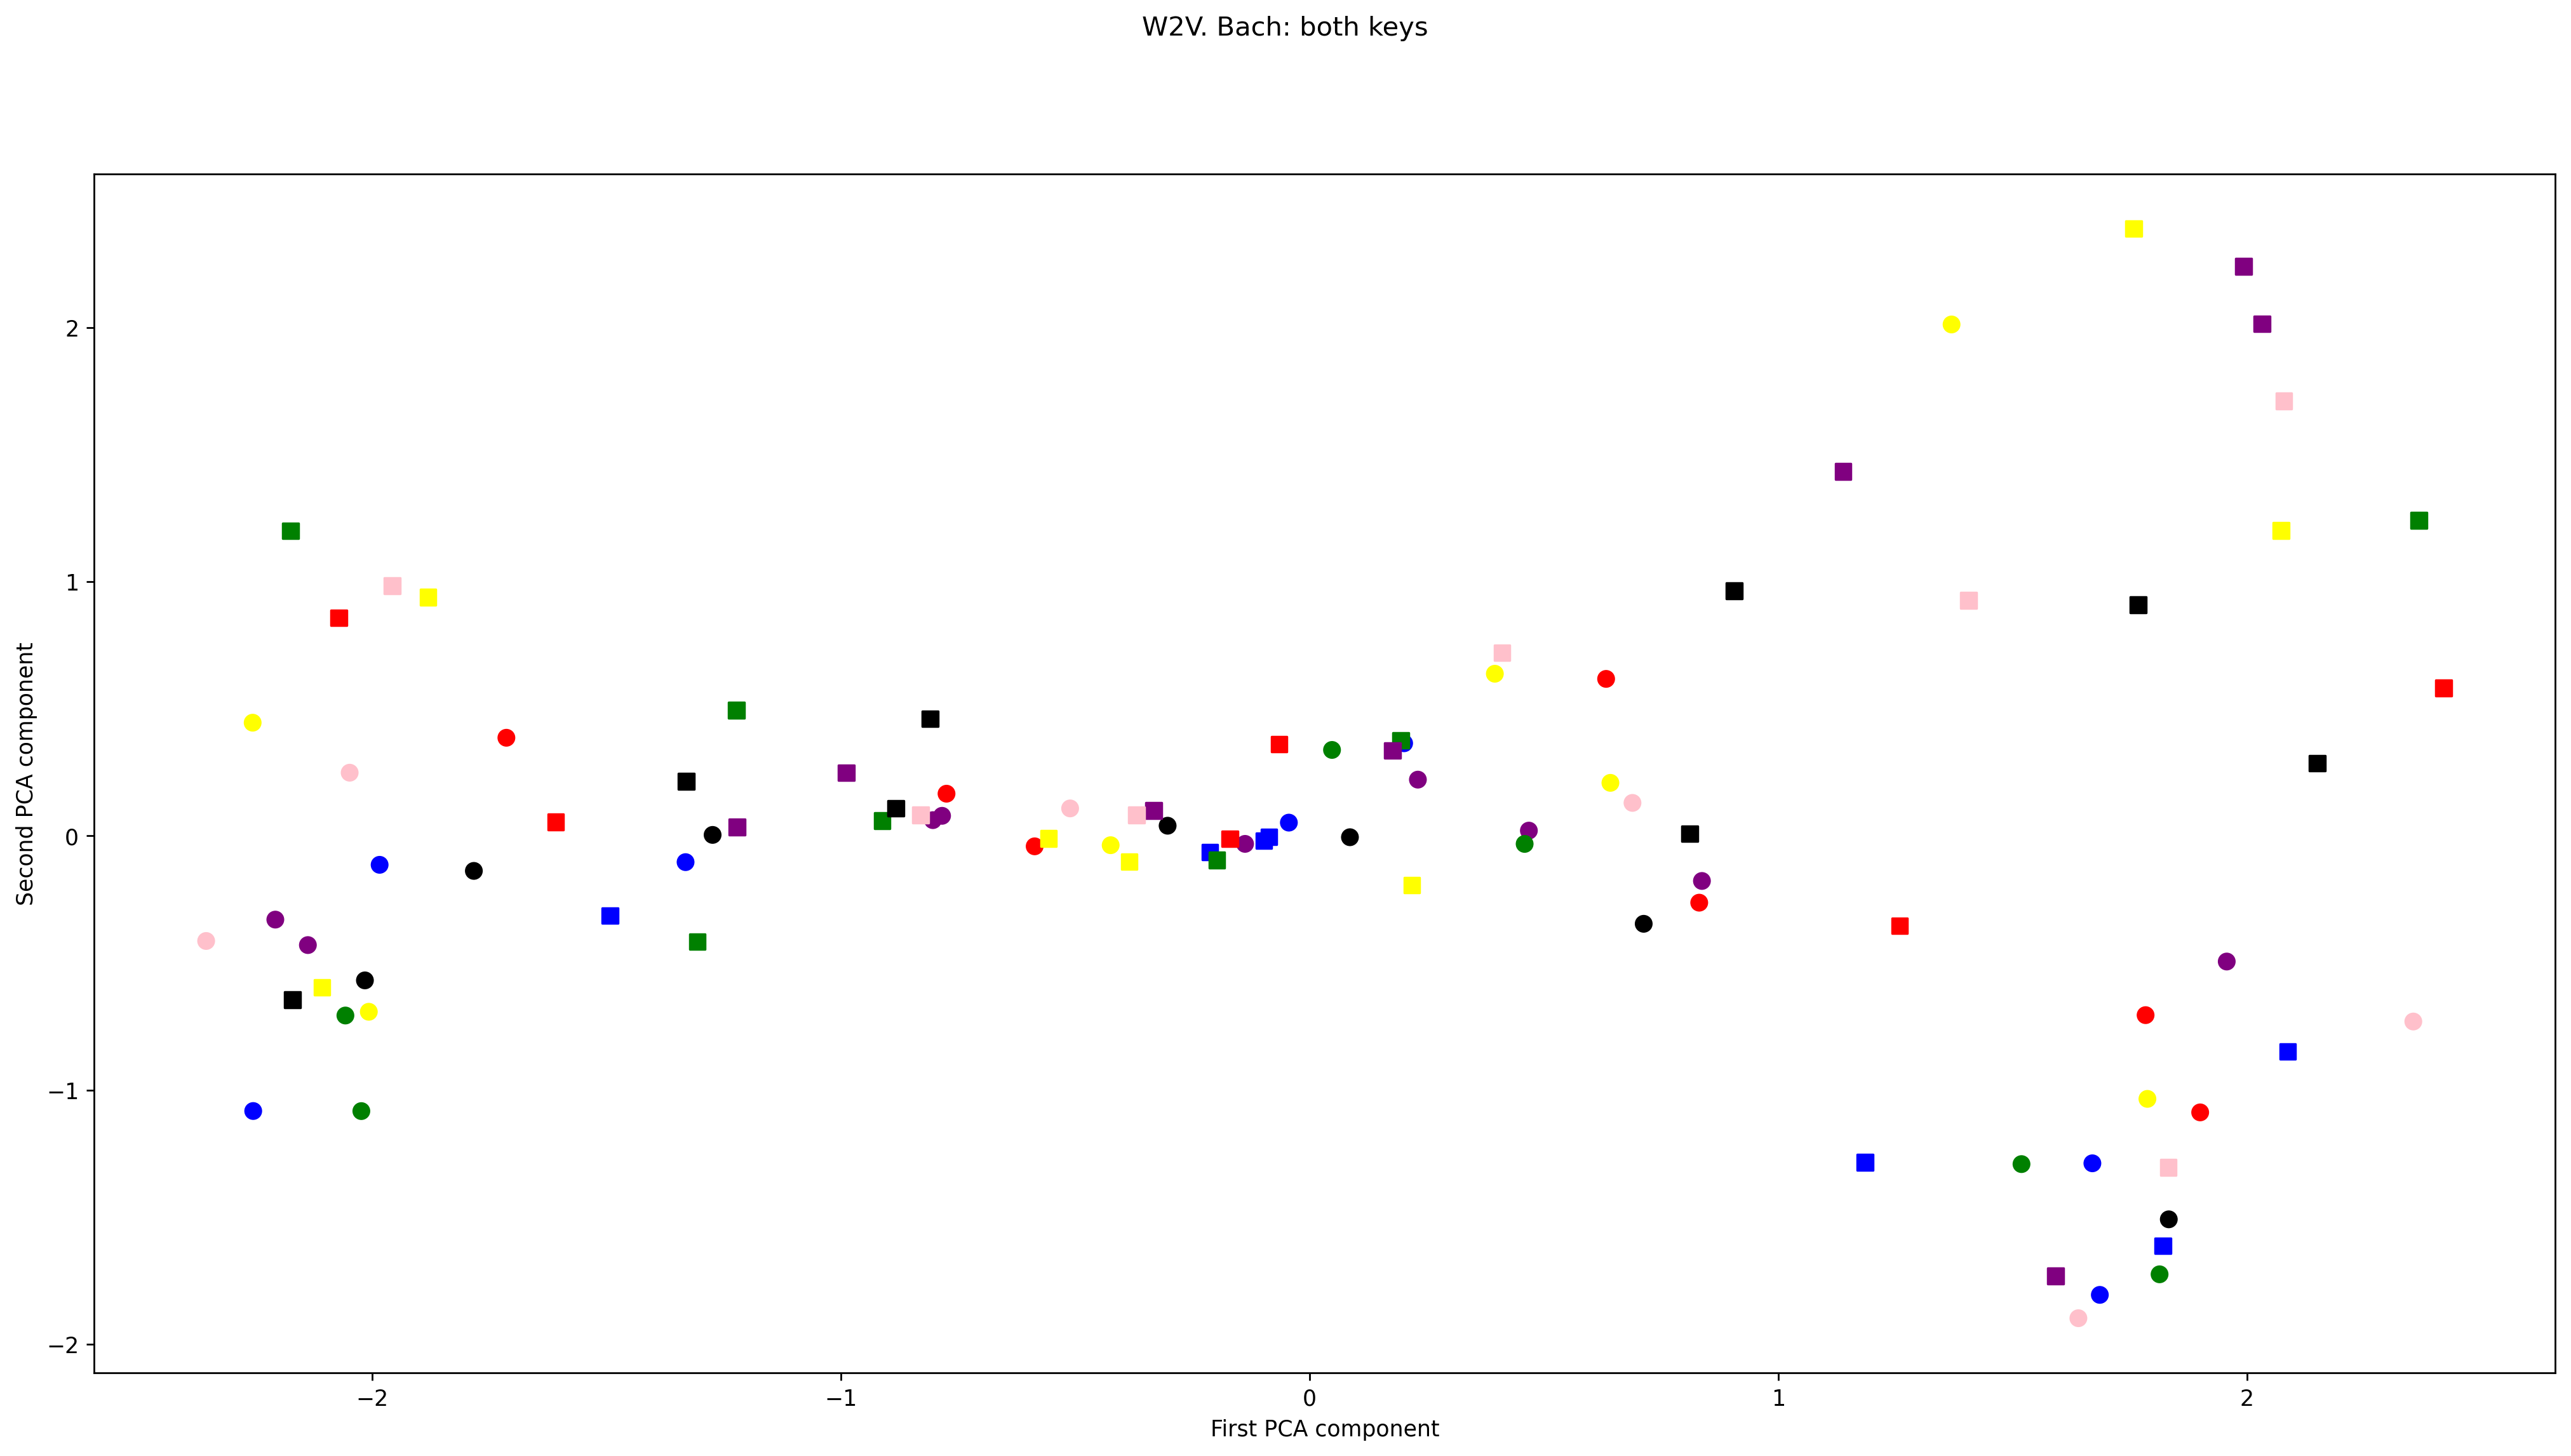

In [9]:
visual_reduced_chord_vectors(wv_red, dimred_method='PCA', plot_title='W2V. Bach: both keys')

## Investigate similarities

In [10]:
model_bach_both.wv.similarity('MINOR;I:MIN', 'MINOR;V:DIM')

0.5700662

In [11]:
model_bach_both.wv.most_similar('MINOR;I:MIN', topn = 10)

[('MINOR;II:DIM', 0.9600809216499329),
 ('MINOR;V:MAJ', 0.921547532081604),
 ('MINOR;##IV:DIM', 0.9188328981399536),
 ('MINOR;#IV:MAJ', 0.9035054445266724),
 ('MINOR;IV:MIN', 0.8971078395843506),
 ('MINOR;#VII:DIM', 0.8959905505180359),
 ('MINOR;III:AUG', 0.8877447247505188),
 ('MINOR;VI:MAJ', 0.8751062154769897),
 ('MINOR;#VII:MIN', 0.8725321292877197),
 ('MINOR;VII:DIM', 0.870558500289917)]

In [12]:
model_bach_both.wv.most_similar('MAJOR;I:MIN', topn = 10)

[('MAJOR;IV:MIN', 0.9697679281234741),
 ('MAJOR;II:DIM', 0.9615043997764587),
 ('MAJOR;bVI:MAJ', 0.9587019085884094),
 ('MAJOR;VI:DIM', 0.9324257969856262),
 ('MAJOR;bVII:MIN', 0.9290088415145874),
 ('MAJOR;bII:MAJ', 0.916262149810791),
 ('MAJOR;#IV:MAJ', 0.9146826863288879),
 ('MAJOR;bIII:MAJ', 0.9137301445007324),
 ('MAJOR;I:DIM', 0.9127391576766968),
 ('MAJOR;V:DIM', 0.9087599515914917)]

In [13]:
def all_in_one(composers, key_mode = 'both', min_count = 10, size = 20, window=2, sg=0,
               dimred_method = 'PCA', draw_grath=True, plot_title = 'W2V. All composers: both keys', 
               print_similarities=True, topn = 4):
    '''
    Composers: takes as input a list whose elements are strings with the names of the composers considered
    key_mode: a string: can be 'Major', 'Minor' or 'both'
    min_count: integer: it ignores the chords that appear less than 'min_count' times in the training
    size: integer: the size of the embedding space
    window: integer: the window of word considered for the prediction in the training
    sg: 0 for CBOW, 1 for skip-gram
    dimred_mothod: string indicating the method used for dimentionality reduction: 'PCA' or 'TSNE'
    
    for visualization:
    draw_grath: boolean value: if True, draw a plot of the reduced dimention
    plot_title: title of the plot
    print_similarities: boolean value: if True, for each chord in the dictionary prints the topn most similar
    top: integer: paramiter for print_similarities
    '''
    
    # Optional parameter for load_chord_data: key_mode = 'both'/'major'/'minor'
    chords = load_chord_data(composers, key_mode)

    # The first argument has to be a list of lists of words
    model = Word2Vec(chords, min_count=min_count, size=size, window=window, sg=sg)
    
    #performs dimention reduction with PCA or TSNE, according to what is specified in the arguments
    pca = PCA(n_components=2)
    tsne = TSNE(n_components=2)
    wv_red = None 
    if dimred_method=='PCA':
        wv_red = reduce_dim_keyed_vec(model.wv, pca.fit_transform)
    elif dimred_method=='TSNE':
        wv_red = reduce_dim_keyed_vec(model.wv, tsne.fit_transform)
    
    if draw_grath:
        visual_reduced_chord_vectors(wv_red, dimred_method = dimred_method, plot_title=plot_title)
    
    #for each chord in the dictionary, prints the 'topn' most similar chords in the embedding space
    if print_similarities:
        sorted_chords=list(model.wv.vocab.keys())
        sorted_chords.sort()
        for chord in sorted_chords:
            similar=':'
            for neighbour, similarity in model.wv.most_similar(chord, topn=topn):
                similar +=f' ({neighbour}, {similarity:.3f}),'
            print(chord + similar)

## Plaing around with parameters
vary the window size and the min_count

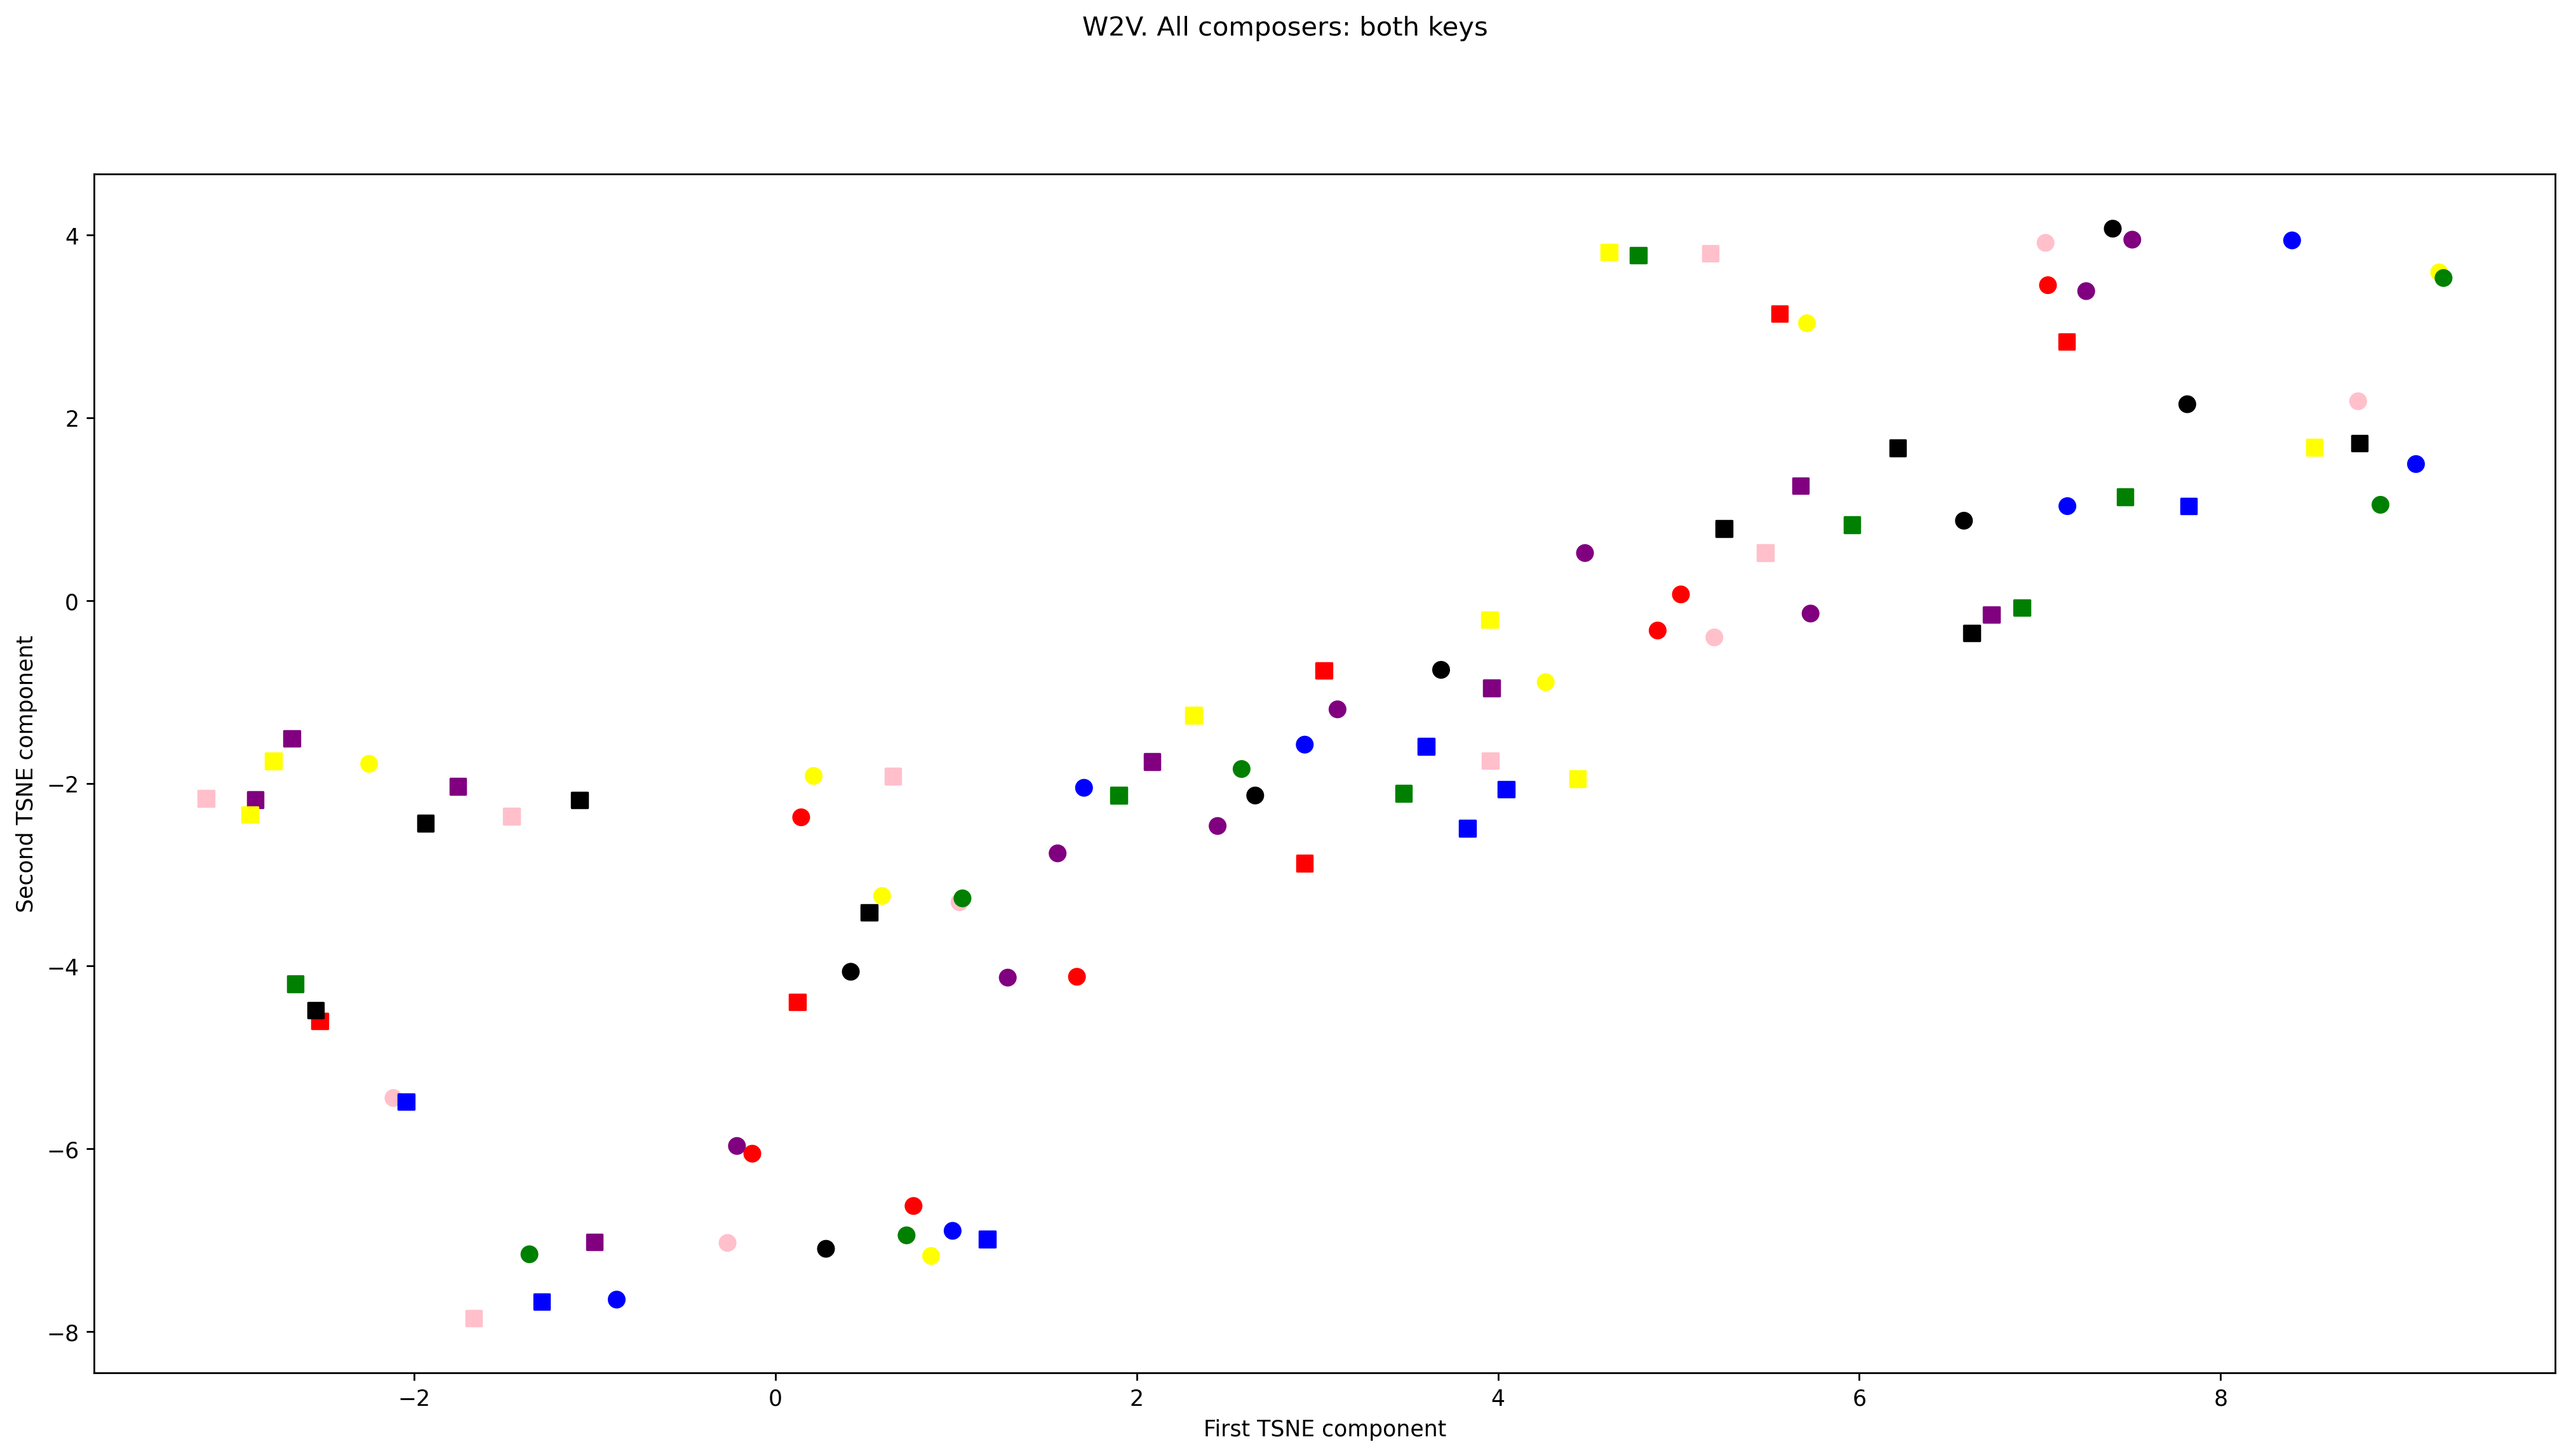

In [14]:
all_in_one(all_composers, key_mode = 'both', min_count = 10, size = 20, window=2, sg=0,
               dimred_method = 'TSNE', draw_grath= True, print_similarities=False)

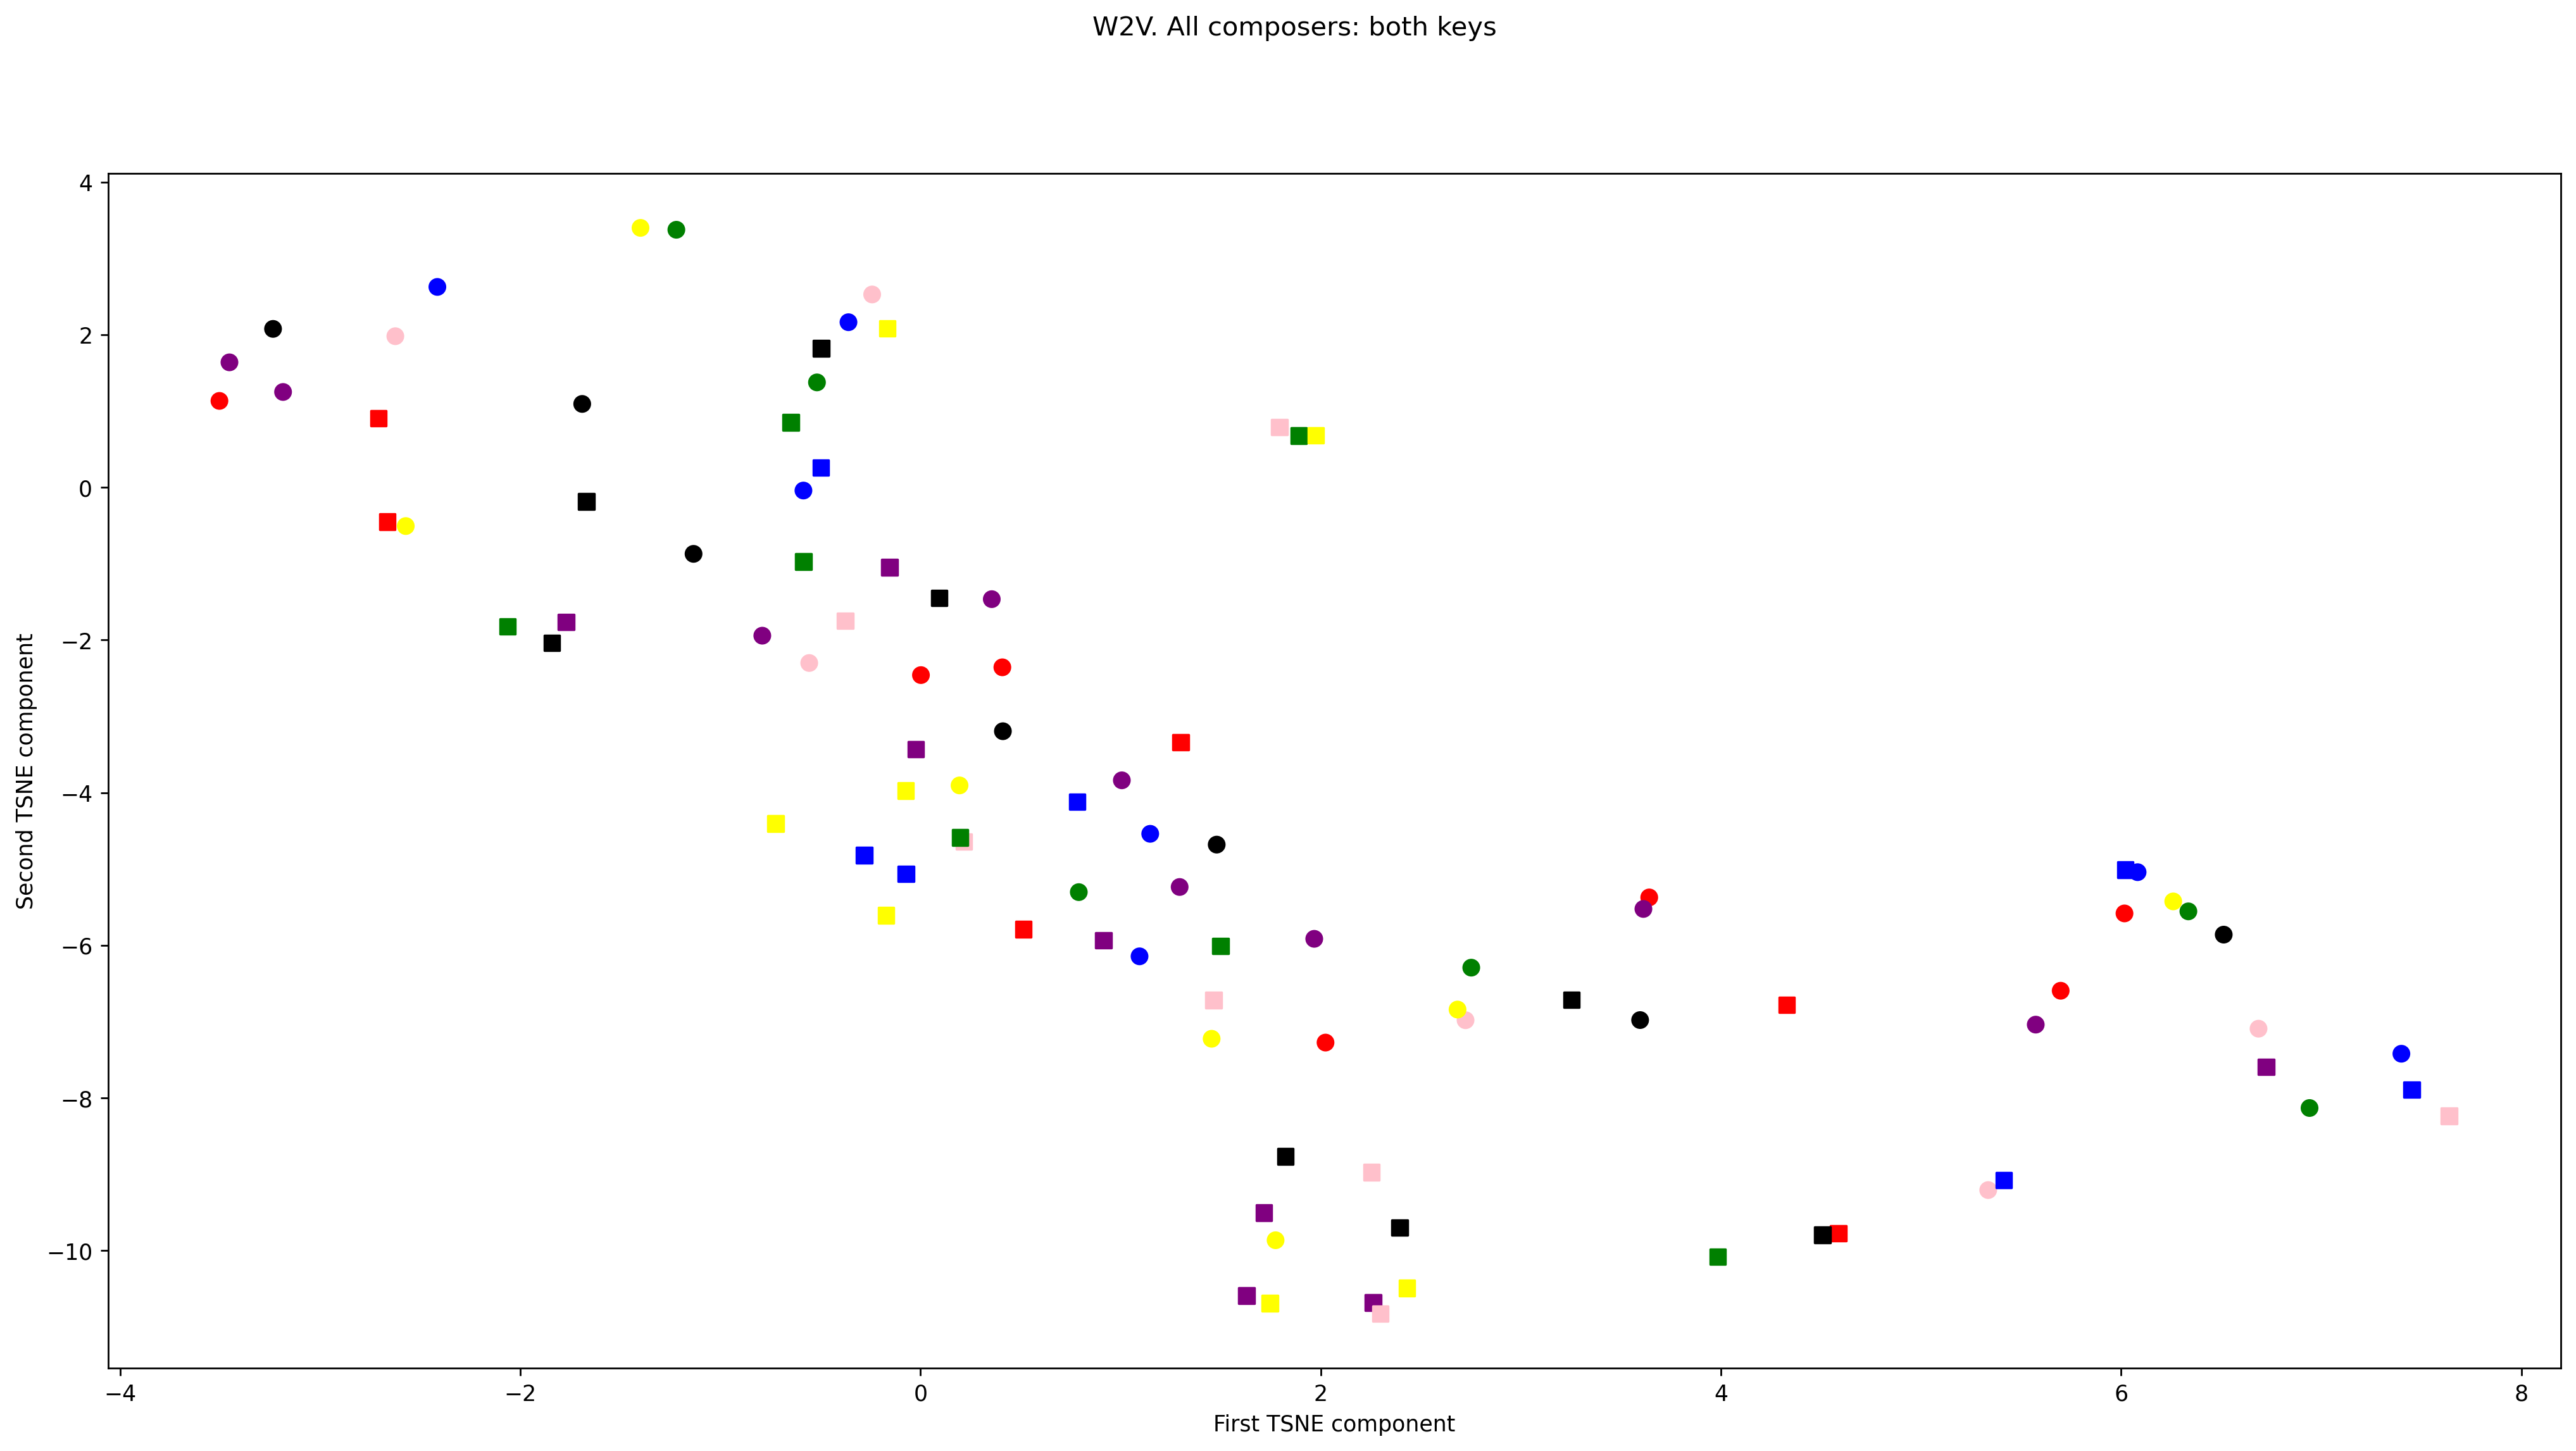

In [16]:
all_in_one(all_composers, key_mode = 'both', min_count = 10, size = 20, window=4, sg=0,
               dimred_method = 'TSNE', draw_grath=True, print_similarities= False)

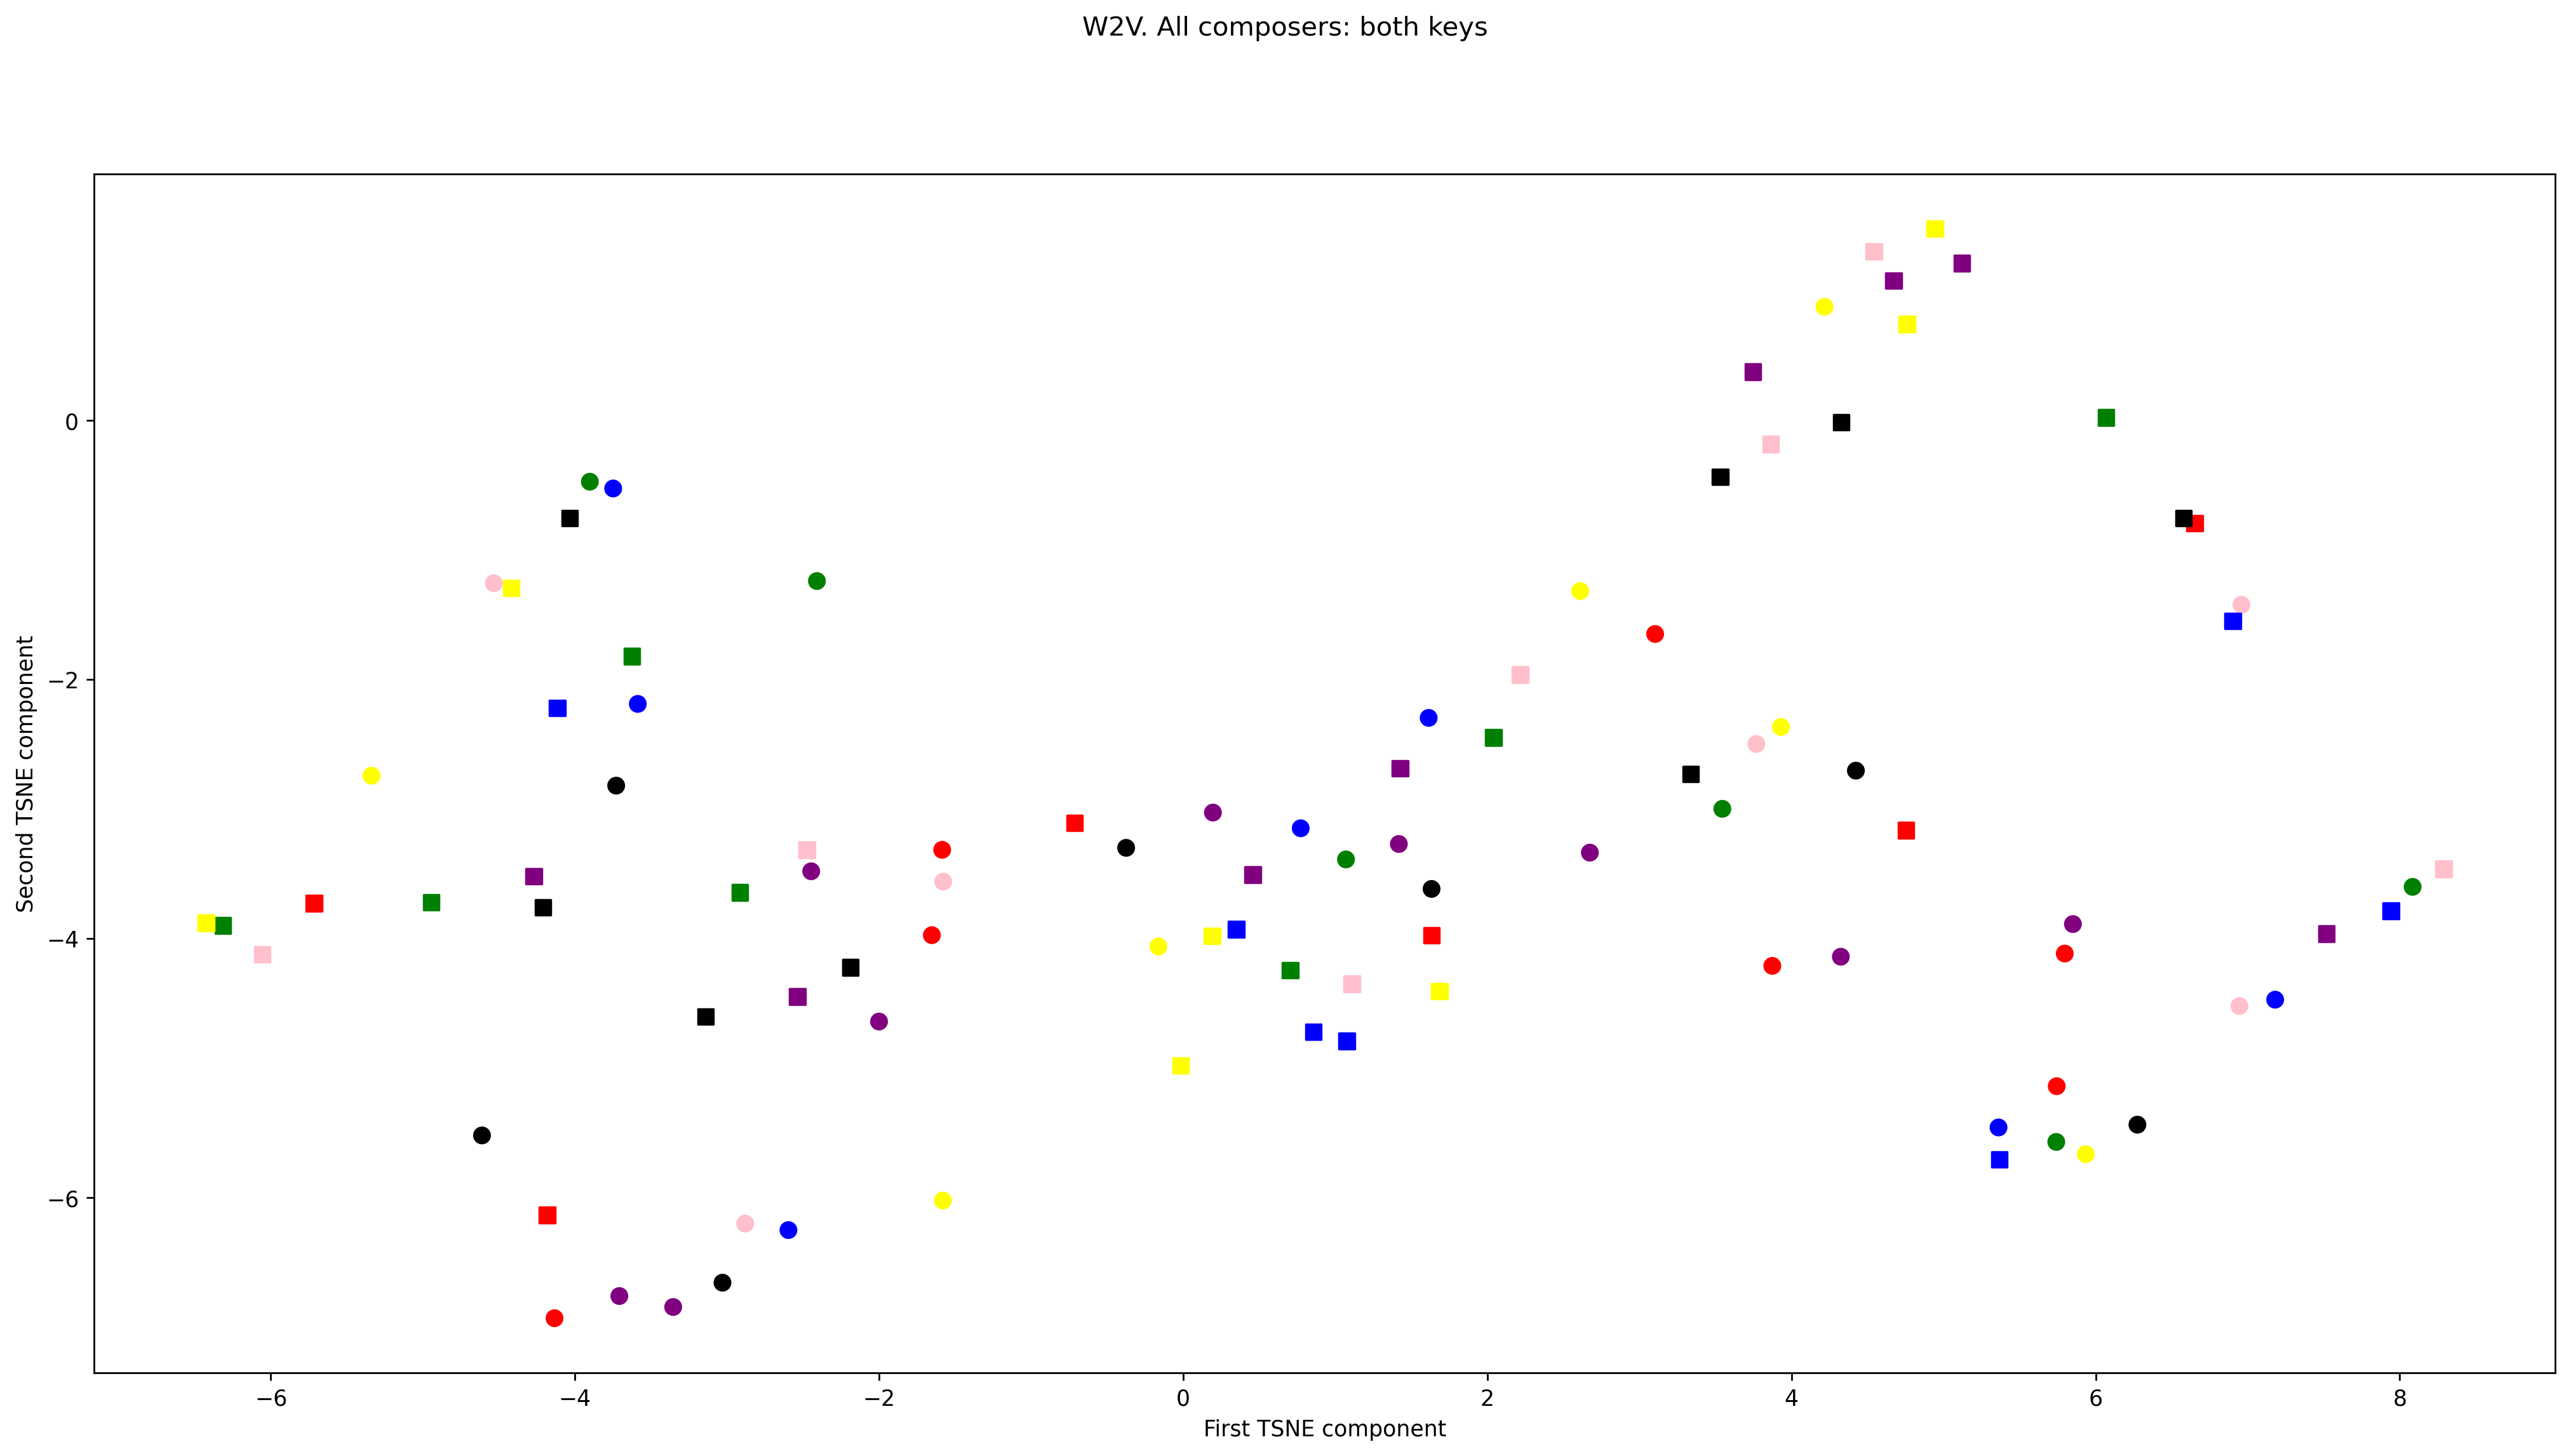

In [17]:
all_in_one(all_composers, key_mode = 'both', min_count = 10, size = 20, window=6, sg=0,
               dimred_method = 'TSNE', draw_grath=True, print_similarities= False)

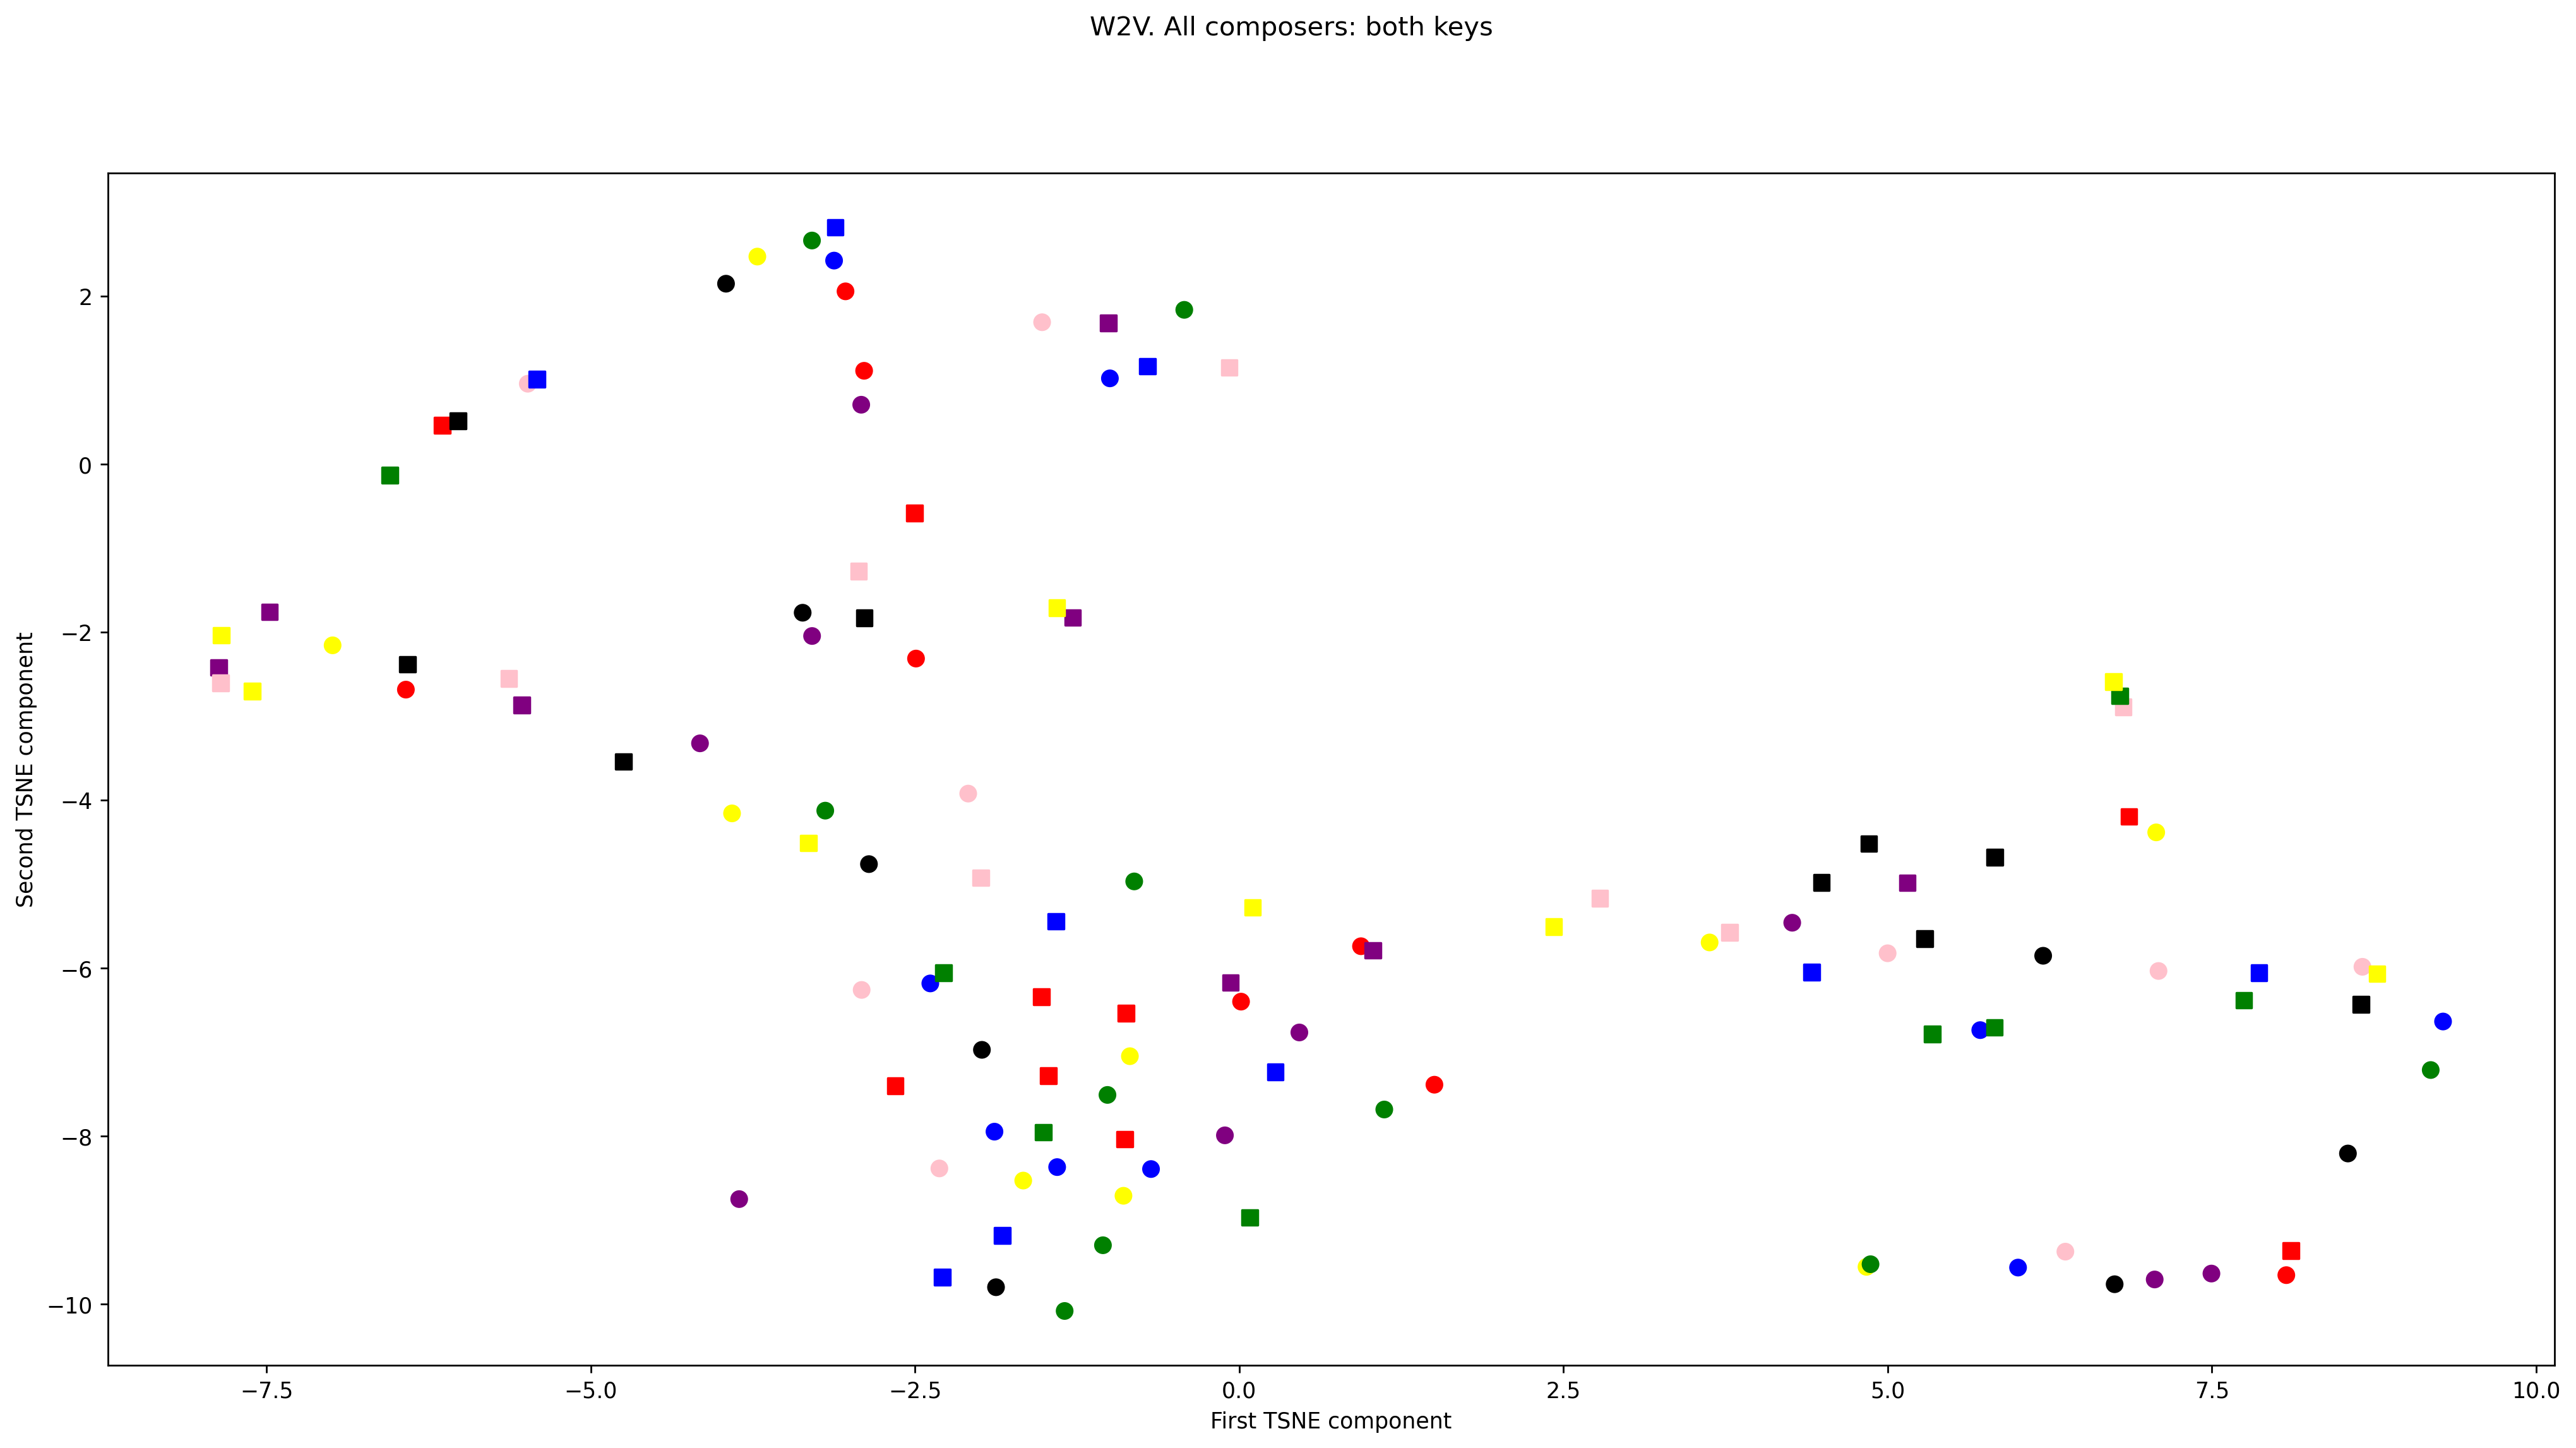

In [18]:
all_in_one(all_composers, key_mode = 'both', min_count = 5, size = 20, window=6, sg=0,
               dimred_method = 'TSNE', draw_grath=True, print_similarities= False)